In [3]:
import pandas as pd
import os

# Define the directory containing the simulated data
simulated_data_dir = "/home/brunobo/Documents/levitador_magnetico/levitador_stm32/testing/test_simulations"

# Check if the directory exists and get a list of CSV files in the directory
if os.path.exists(simulated_data_dir):
    files = [f for f in os.listdir(simulated_data_dir) if f.endswith('.csv')]
else:
    files = []

files

['kalman_qi0p0021_qh0p001_ni0p01_nh0p005_bh0p0001.csv',
 'kalman_qi0p0021_qh0p001_ni0p0001_nh0p0001_bh0p0002.csv',
 'kalman_qi0p0021_qh0p0015_ni0p01_nh0p005_bh0p0001.csv',
 'kalman_qi0_qh0p0005_ni0p01_nh0p0005_bh0p0002.csv',
 'kalman_qi0p0021_qh0p001_ni0p01_nh0p001_bh0p0005.csv',
 'kalman_qi0p0021_qh0p005_ni0p01_nh0p0005_bh0p0001.csv',
 'kalman_qi0_qh0p001_ni0p01_nh0p0005_bh0p0002.csv',
 'kalman_qi0_qh0p0005_ni0p001_nh0p0005_bh0p0002.csv',
 'kalman_qi0_qh0_ni0p001_nh0p0005_bh0p0002.csv',
 'kalman_qi0p0021_qh0p003_ni0p01_nh0p0005_bh0p0001.csv',
 'kalman_qi0p0021_qh0p001_ni0p01_nh0p001_bh0p0002.csv',
 'kalman_qi0p0021_qh0p001_ni0p01_nh0p0005_bh0p0002.csv']

In [4]:
import re

def extract_parameters(filename):
    """
    Extract parameters from the filename and return them as a dictionary.
    """
    pattern = r"qi(\d+p\d+)_qh(\d+p\d+)_ni(\d+p\d+)_nh(\d+p\d+)_bh(\d+p\d+)"
    match = re.search(pattern, filename)
    if match:
        return {
            "filename": filename,
            "quantization_i": float(match.group(1).replace('p', '.')),
            "quantization_h": float(match.group(2).replace('p', '.')),
            "noise_std_i": float(match.group(3).replace('p', '.')),
            "noise_std_h": float(match.group(4).replace('p', '.')),
            "bias_h": float(match.group(5).replace('p', '.')),
        }
    return None

# Apply the function to the list of files and sort by parameters
files_with_params = [extract_parameters(f) for f in files if extract_parameters(f) is not None]
sorted_files = sorted(files_with_params, key=lambda x: (x["quantization_i"], x["quantization_h"], x["noise_std_i"], x["noise_std_h"], x["bias_h"]))

sorted_files_df = pd.DataFrame(sorted_files)

sorted_files_df

,filename,quantization_i,quantization_h,noise_std_i,noise_std_h,bias_h
0,kalman_qi0p0021_qh0p001_ni0p0001_nh0p0001_bh0p...,0.0021,0.0010,0.0001,0.0001,0.0002
1,kalman_qi0p0021_qh0p001_ni0p01_nh0p0005_bh0p00...,0.0021,0.0010,0.0100,0.0005,0.0002
2,kalman_qi0p0021_qh0p001_ni0p01_nh0p001_bh0p000...,0.0021,0.0010,0.0100,0.0010,0.0002
3,kalman_qi0p0021_qh0p001_ni0p01_nh0p001_bh0p000...,0.0021,0.0010,0.0100,0.0010,0.0005
4,kalman_qi0p0021_qh0p001_ni0p01_nh0p005_bh0p000...,0.0021,0.0010,0.0100,0.0050,0.0001
5,kalman_qi0p0021_qh0p0015_ni0p01_nh0p005_bh0p00...,0.0021,0.0015,0.0100,0.0050,0.0001
6,kalman_qi0p0021_qh0p003_ni0p01_nh0p0005_bh0p00...,0.0021,0.0030,0.0100,0.0005,0.0001
7,kalman_qi0p0021_qh0p005_ni0p01_nh0p0005_bh0p00...,0.0021,0.0050,0.0100,0.0005,0.0001


In [6]:
import matplotlib.pyplot as plt
# Use the index to select which file to open next
selected_index = 1  # Change this index to select a different file
selected_file = sorted_files_df.loc[selected_index, "filename"]

# open selected file as a pandas dataframe
selected_file_path = os.path.join(simulated_data_dir, selected_file)
print(f"Selected file path: {selected_file_path}")
# Read the CSV file into a DataFrame
df = pd.read_csv(selected_file_path, na_values=["NaN"])
df.head()

Selected file path: /home/brunobo/Documents/levitador_magnetico/levitador_stm32/testing/test_simulations/kalman_qi0p0021_qh0p001_ni0p01_nh0p0005_bh0p0002.csv


,time,measured_current,measured_height,measured_speed,estimated_current,estimated_height,estimated_speed,real_current,real_height,real_speed,measured_u
0,0.000000e+00,1.1046,0.031,NaN,1.0986,0.025042,0.000909,1.0928,0.03,0.000000e+00,4.1529
1,3.155400e-30,1.1046,0.031,NaN,1.0987,0.025085,0.001818,1.0928,0.03,8.991500e-30,4.1733
2,5.000000e-05,1.1046,0.031,NaN,1.0924,0.025128,0.002739,1.0928,0.03,1.424900e-04,4.1733
3,1.000000e-04,1.0983,0.031,NaN,1.0925,0.025170,0.003653,1.0928,0.03,2.883700e-04,4.2049
4,1.500000e-04,1.0983,0.031,NaN,1.0893,0.025205,0.004418,1.0928,0.03,4.376700e-04,4.2490


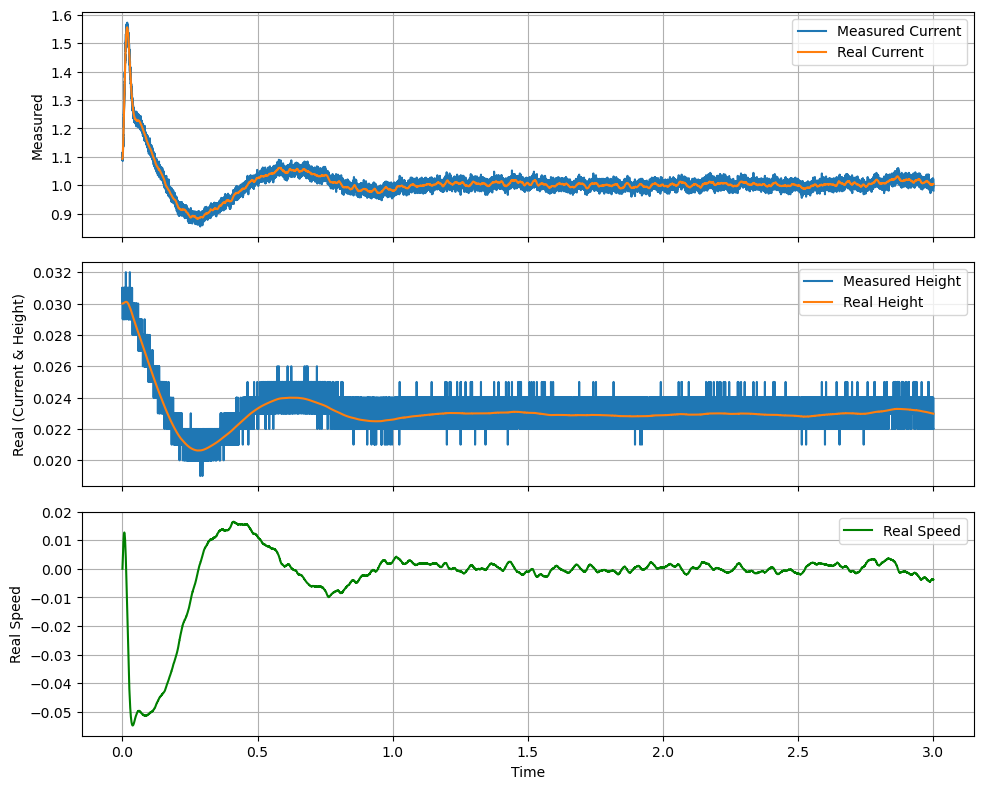

In [9]:

## Plotting stuff
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot 1: measured current and height
axs[0].plot(df['time'], df['measured_current'], label='Measured Current')
axs[0].plot(df['time'], df['real_current'], label='Real Current')
axs[0].set_ylabel("Measured")
axs[0].legend()
axs[0].grid(True)

# Plot 2: real current and height
axs[1].plot(df['time'], df['measured_height'], label='Measured Height')
axs[1].plot(df['time'], df['real_height'], label='Real Height')
axs[1].set_ylabel("Real (Current & Height)")
axs[1].legend()
axs[1].grid(True)

# Plot 3: real speed
axs[2].plot(df['time'], df['real_speed'], label='Real Speed', color='green')
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Real Speed")
axs[2].legend()
axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
from kalman_compare import apply_python_kalman, apply_c_kalman


df = pd.read_csv('…')  # your dataframe
df_py = apply_python_kalman(df)
df_both = apply_c_kalman(df_py)

ModuleNotFoundError: No module named 'kalman_compare'